In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Loading Dataset:-

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 7043 observations with 21 features.


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Checking Null values in the DataFrame:-

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As we can see there is no null or missing values are present in this dataset

# Dataframe Description:-

The dataset contains the data of customers.
It contains customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'.

# Checking the datatype of the column:-

In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

as we can see most data is in object type but we know 'TotalCharges ' is a continious data but here it is stored in object type of data...soo lets check this column.

In [14]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [15]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


with this oservation we saw that some column have space as the Value.. we can see totalcahrges is blank.

In [16]:
#now we have to put null values on the space of totalcharge
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [17]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

now we can see null values are present on Totalcharges column..as we are successfully added null values on blank space

In [18]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [19]:
df["TotalCharges"]=df["TotalCharges"].fillna(np.mean(df['TotalCharges']))

In [20]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

As we can see there is no nulll values as present

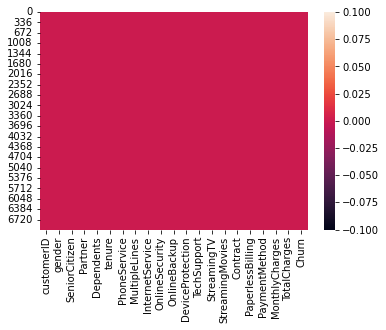

In [64]:
sns.heatmap(df.isnull())
plt.show()

we can see there is no null value are present in this dataset

In [21]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

now TotalCharges change to float type

In [23]:
df_visualization_nominal=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']].copy()

In [24]:
df_visualization_nominal

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


# Visualization of Data:-

<AxesSubplot:>

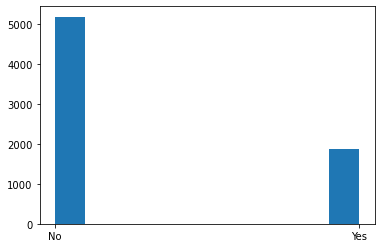

In [65]:
df['Churn'].hist(grid=False)

Male      3555
Female    3488
Name: gender, dtype: int64

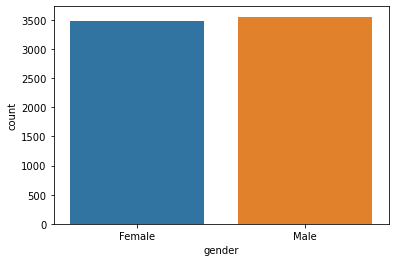

In [25]:
sns.countplot(x='gender',data=df_visualization_nominal)
df_visualization_nominal['gender'].value_counts()

from the above observation we came to know that there is no huge diffrence male and female i.e 3555 & 3488 respectivly

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

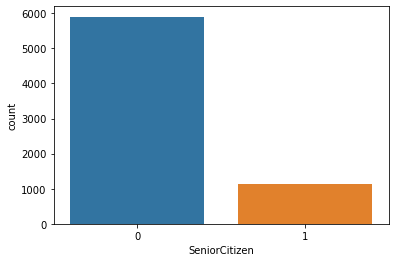

In [26]:
sns.countplot(x='SeniorCitizen',data=df_visualization_nominal)
df_visualization_nominal['SeniorCitizen'].value_counts()

from the above observation we can see here "0" repesents the younger customer and "1" represents seniorcitizen -Here we can see ther is 5901 younger customers and 1142 senior citizns are present in our dataset

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

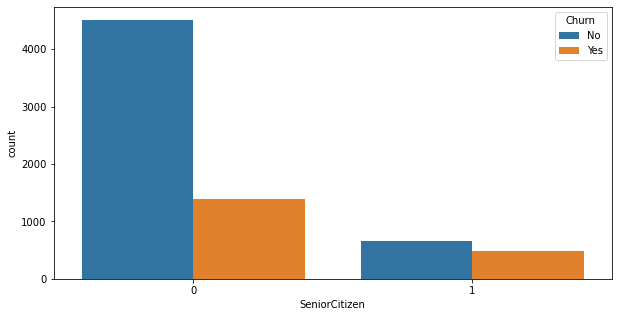

In [53]:
plt.figure(figsize = (10,5))
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

No     3641
Yes    3402
Name: Partner, dtype: int64

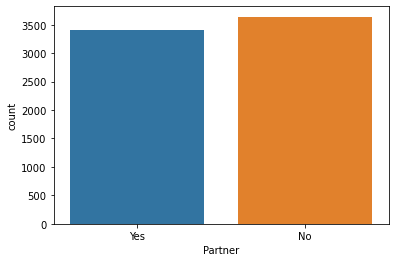

In [27]:
sns.countplot(x='Partner',data=df_visualization_nominal)
df_visualization_nominal['Partner'].value_counts()

from the above observation we can see there is 3402 customers are married and 3641 customers are unmarried

No     4933
Yes    2110
Name: Dependents, dtype: int64

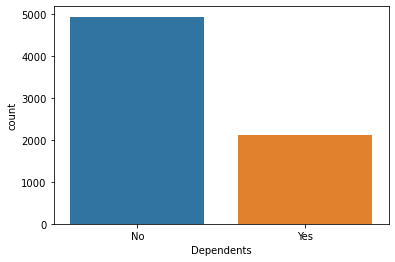

In [28]:
sns.countplot(x='Dependents',data=df_visualization_nominal)
df_visualization_nominal['Dependents'].value_counts()

from the above observation we can see there is 2110 customers are dependent where 4933 customers are independent.

Yes    6361
No      682
Name: PhoneService, dtype: int64

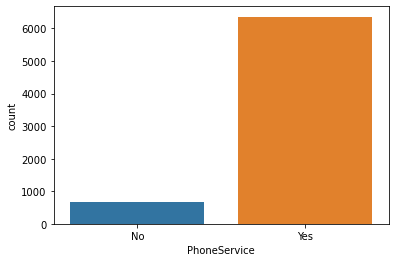

In [30]:
sns.countplot(x='PhoneService',data=df_visualization_nominal)
df_visualization_nominal['PhoneService'].value_counts()

as we can see there is 6361 cutomers using phone service where as 682 customers are not using phone service

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

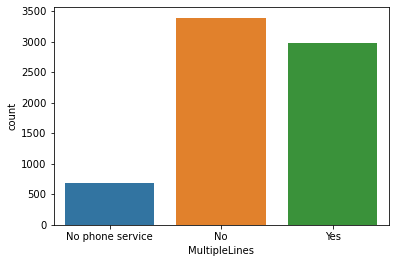

In [31]:
sns.countplot(x='MultipleLines',data=df_visualization_nominal)
df_visualization_nominal['MultipleLines'].value_counts()

from above observation we can see that there are 682 customers dont have phone service where as 3390 customers are using no multiple service and 2971 customers are using multiple lines.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

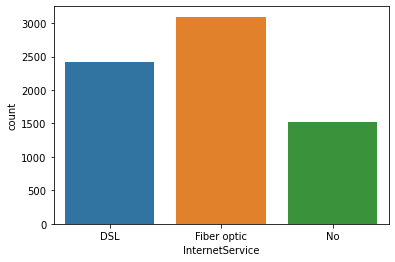

In [32]:
sns.countplot(x='InternetService',data=df_visualization_nominal)
df_visualization_nominal['InternetService'].value_counts()

from above observation we can see that there are 1526 customers not using any internet service ,where 2421 customer use DSL internet service & 3096 customers are using Fiber optic Internet

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

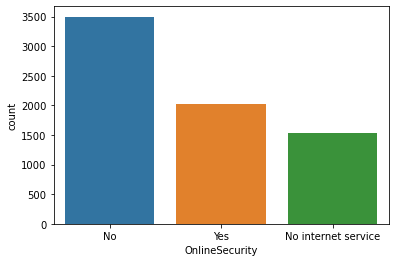

In [33]:
sns.countplot(x='OnlineSecurity',data=df_visualization_nominal)
df_visualization_nominal['OnlineSecurity'].value_counts()

as we can see there is 1526 customers who has no internet service soo there is no chance for online security to them. And there is 2019 customers using onlinesecurity where 3498 cusomers don't use online security

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

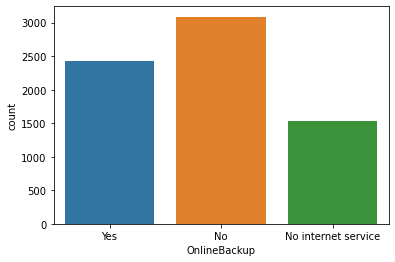

In [34]:
sns.countplot(x='OnlineBackup',data=df_visualization_nominal)
df_visualization_nominal['OnlineBackup'].value_counts()

as we can see there is 1526 customers who has no internet service soo there is no chance for online backup for them. And there is 2429 customers using onlinebackup where 3088 customers don't use online backup

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

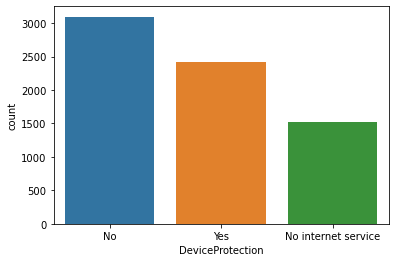

In [35]:
sns.countplot(x='DeviceProtection',data=df_visualization_nominal)
df_visualization_nominal['DeviceProtection'].value_counts()

as we can see there is 1526 customers who has no internet service soo there is no chance for DeviceProtection for them. And there is 2422 customers using DeviceProtection where 3095 customers don't use DeviceProtection service

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

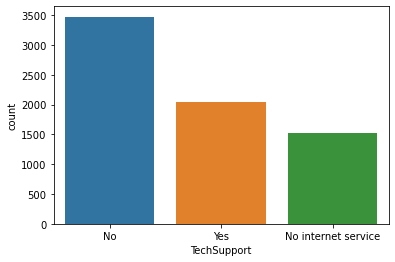

In [36]:
sns.countplot(x='TechSupport',data=df_visualization_nominal)
df_visualization_nominal['TechSupport'].value_counts()

as we can see there is 1526 customers who has no internet service soo there is no TechSupport for them. And there is 2044 customers using TechSupport where 3473 customers not use TechSupport service

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

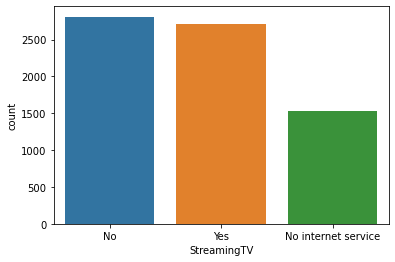

In [37]:
sns.countplot(x='StreamingTV',data=df_visualization_nominal)
df_visualization_nominal['StreamingTV'].value_counts()

from above observation we can see that there are 1526 customers has no internet service so there is no chance for them to streaming tv, where 2707 customers are using StreamingTV service and 2810 customers are not StreamingTV

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

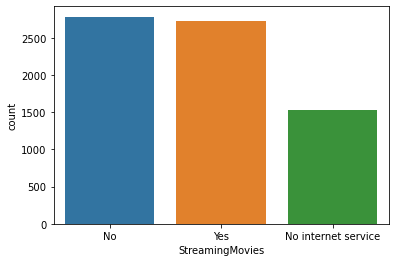

In [38]:
sns.countplot(x='StreamingMovies',data=df_visualization_nominal)
df_visualization_nominal['StreamingMovies'].value_counts()

From above observation we can see that there are 1526 customers has no internet service so there is no chance for them to streaming movies, where 2732 customers are using Streamingmovies service and 2785 customers are not Streamingmovies

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

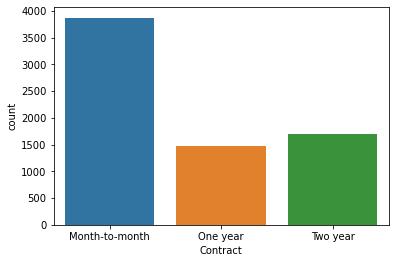

In [39]:
sns.countplot(x='Contract',data=df_visualization_nominal)
df_visualization_nominal['Contract'].value_counts()

as we can see there is 3875 month-month contract,1473 onne year contacts and 1695 two year of contracts 

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

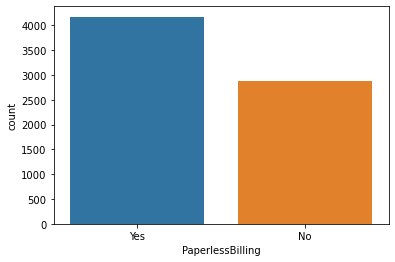

In [40]:
sns.countplot(x='PaperlessBilling',data=df_visualization_nominal)
df_visualization_nominal['PaperlessBilling'].value_counts()

as we can see there is 4171 customers prefer paperless billing where 2872 customers prefer with paper billing

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

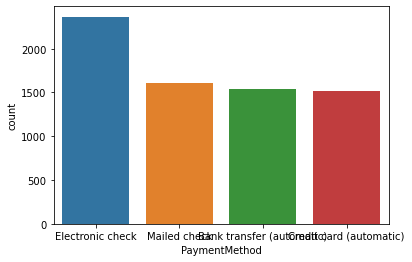

In [41]:
sns.countplot(x='PaymentMethod',data=df_visualization_nominal)
df_visualization_nominal['PaymentMethod'].value_counts()

as we can see there are 2365 customers who prefer Electronic check,1612 customers prefer mailed check,1544 customers who prefer Banktransfer(auto) and 1522 customers prefer Creditcard(auto) payment methods accordingly.

No     5174
Yes    1869
Name: Churn, dtype: int64

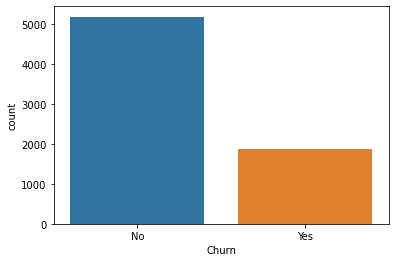

In [42]:
sns.countplot(x='Churn',data=df_visualization_nominal)
df_visualization_nominal['Churn'].value_counts()

there is probabilty of 1869 customers who left and 5174 customers who don't left

In [43]:
df_visualization_ordinal=df[['customerID','tenure']].copy

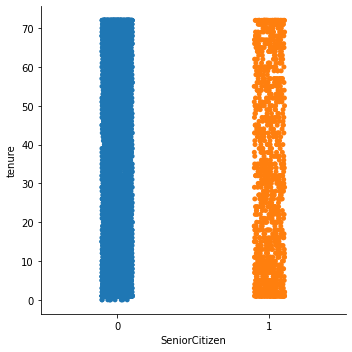

In [44]:
sns.catplot(x='SeniorCitizen',y='tenure',data=df)

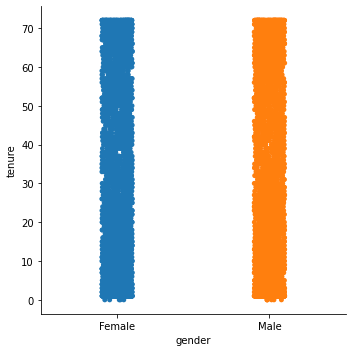

In [45]:
sns.catplot(x='gender',y='tenure',data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

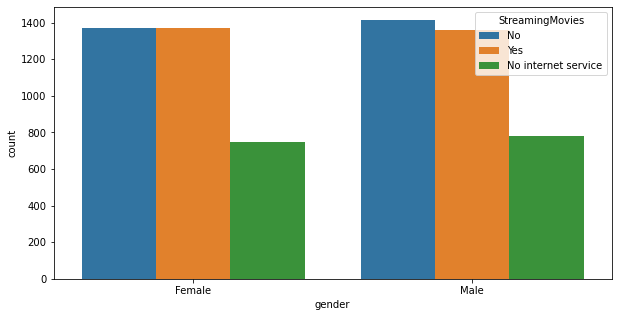

In [46]:
plt.figure(figsize = (10,5))
sns.countplot(x='gender',hue='StreamingMovies',data=df)

here we can see male & females who used streaming movie facilites

<AxesSubplot:xlabel='gender', ylabel='count'>

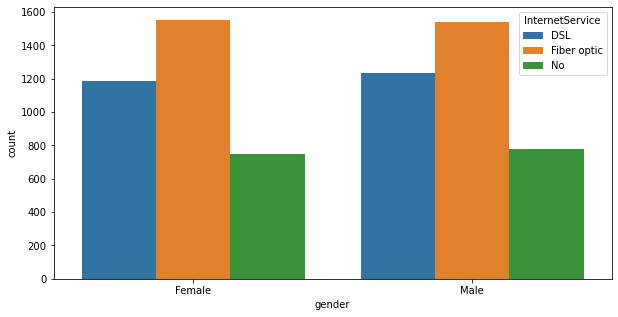

In [48]:
plt.figure(figsize = (10,5))
sns.countplot(x='gender',hue='InternetService',data=df)

here we can see male & females who used internet services

<AxesSubplot:xlabel='gender', ylabel='count'>

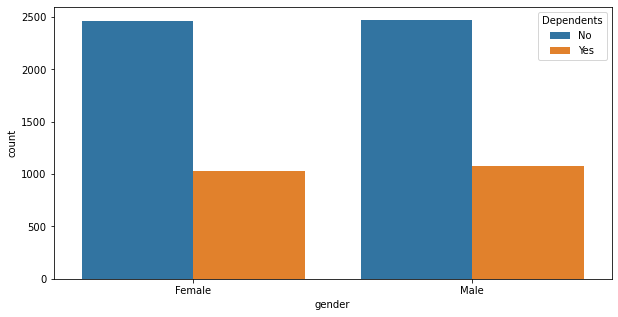

In [49]:
plt.figure(figsize = (10,5))
sns.countplot(x='gender',hue='Dependents',data=df)

almost simillar in both the cases

<AxesSubplot:xlabel='gender', ylabel='count'>

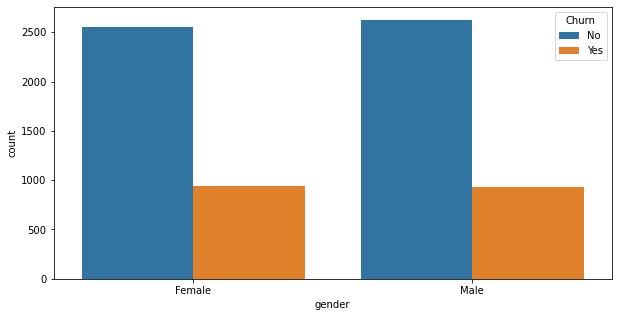

In [47]:
plt.figure(figsize = (10,5))
sns.countplot(x='gender',hue='Churn',data=df)

it seems that mostly equal no of male and female left and stay with the same company

<AxesSubplot:xlabel='Partner', ylabel='count'>

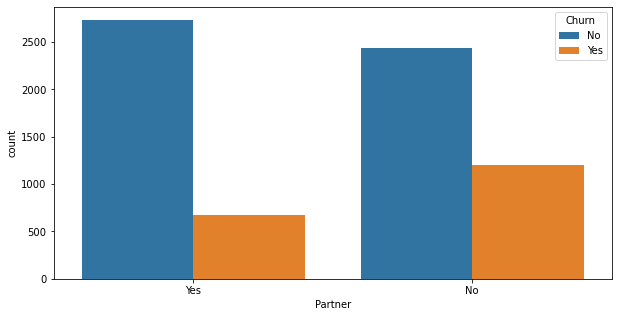

In [54]:
plt.figure(figsize = (10,5))
sns.countplot(x='Partner',hue='Churn',data=df)

as we can see mostly unmarried customers are left 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

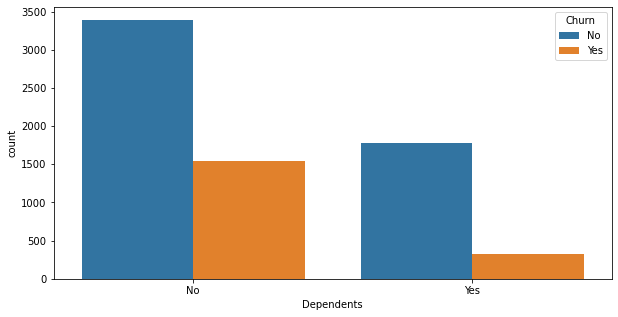

In [55]:
plt.figure(figsize = (10,5))
sns.countplot(x='Dependents',hue='Churn',data=df)

mostly independent customers are churn or left as compare to dependent

In [51]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Checking the distribution of the continuous value of the float type column:-

In [58]:
df_visualization_continuous=df[['MonthlyCharges','TotalCharges']].copy()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

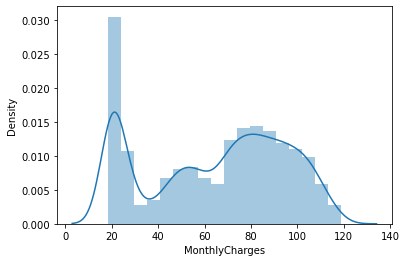

In [59]:
sns.distplot(df_visualization_continuous['MonthlyCharges'],kde=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

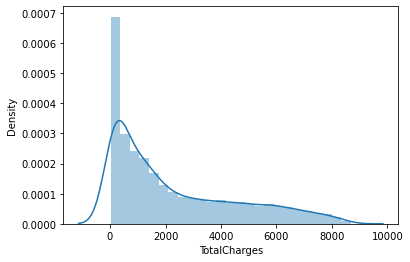

In [60]:
sns.distplot(df_visualization_continuous['TotalCharges'],kde=True)

Since the dataset has a lot of string values contains so we will use encoding techniques to convert the string data to the numerical data

# Encoding the DataFrame:-

In [78]:
from sklearn.preprocessing import OrdinalEncoder

In [79]:
enc=OrdinalEncoder()

In [80]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

# Label Encoding:-

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le=LabelEncoder()

In [68]:
df['Churn']=le.fit_transform(df['Churn'])

In [69]:
le.inverse_transform([1,0])

array(['Yes', 'No'], dtype=object)

In [71]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [82]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Description:-

In [83]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

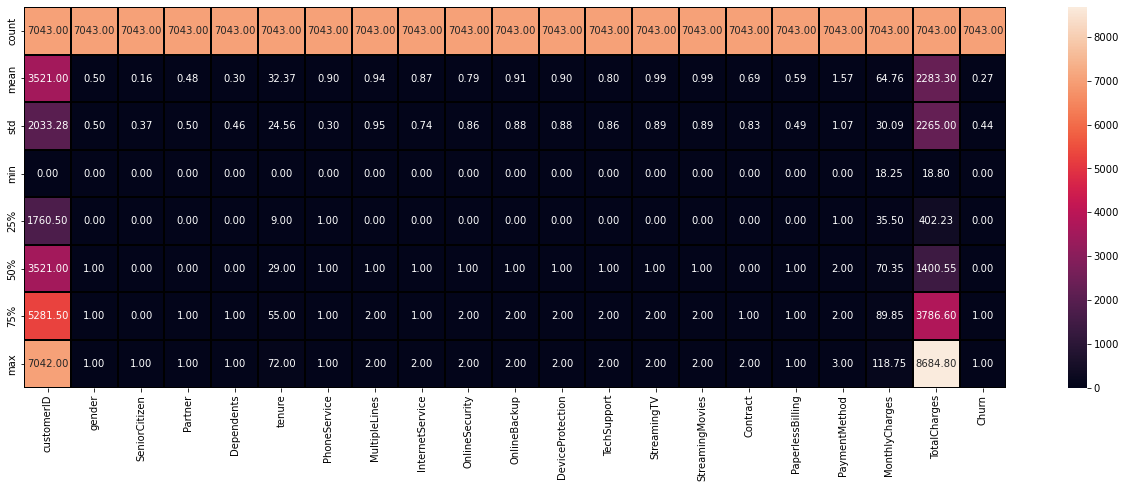

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.01,linecolor='black',fmt='0.2f')

# Checking Correlation:-¶

In [85]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


<AxesSubplot:>

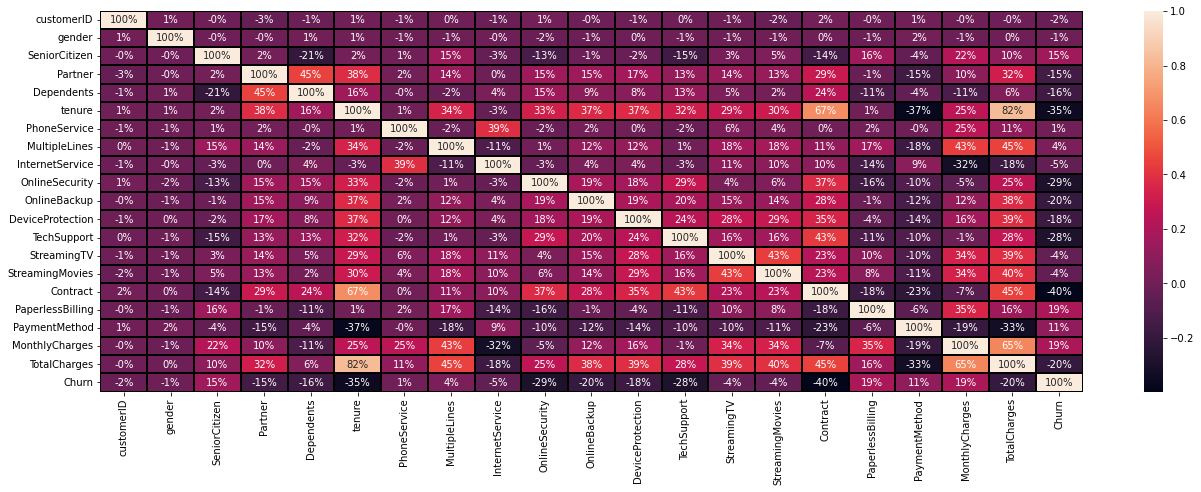

In [86]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.01,linecolor='black',fmt='0.0%')

# Another way to represent columns which is highly correlated:-

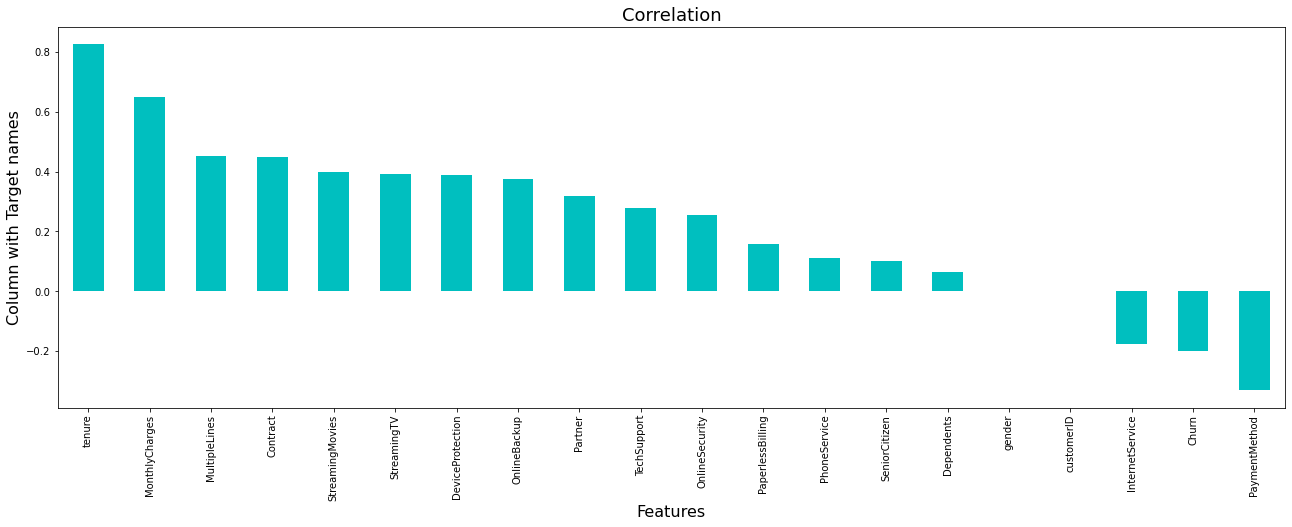

In [87]:
plt.figure(figsize=(22,7))
df.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Column with Target names',fontsize=16)
plt.title('Correlation',fontsize=18)
plt.show()

Data distribution among the plots:-

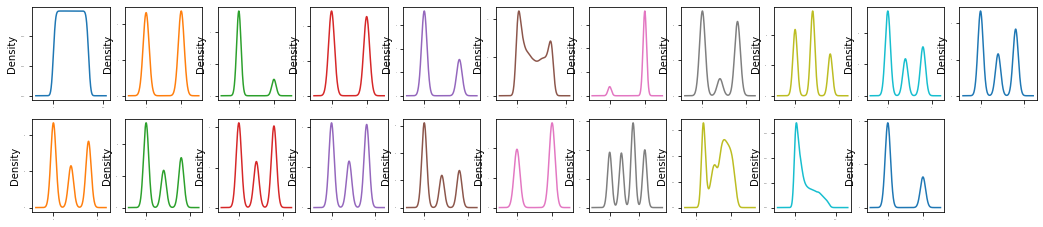

In [89]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

# Checking Skewness:-

In [91]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

Here most of the columns are catagorical datatypes.

almost all datas are between +/- 0.5 range of skewness

SeniorCitizen ,Dependents, PhoneService, contract, Churn are of catagorical datatypes so skewness doesnot affect

# Outliers Checking:-¶

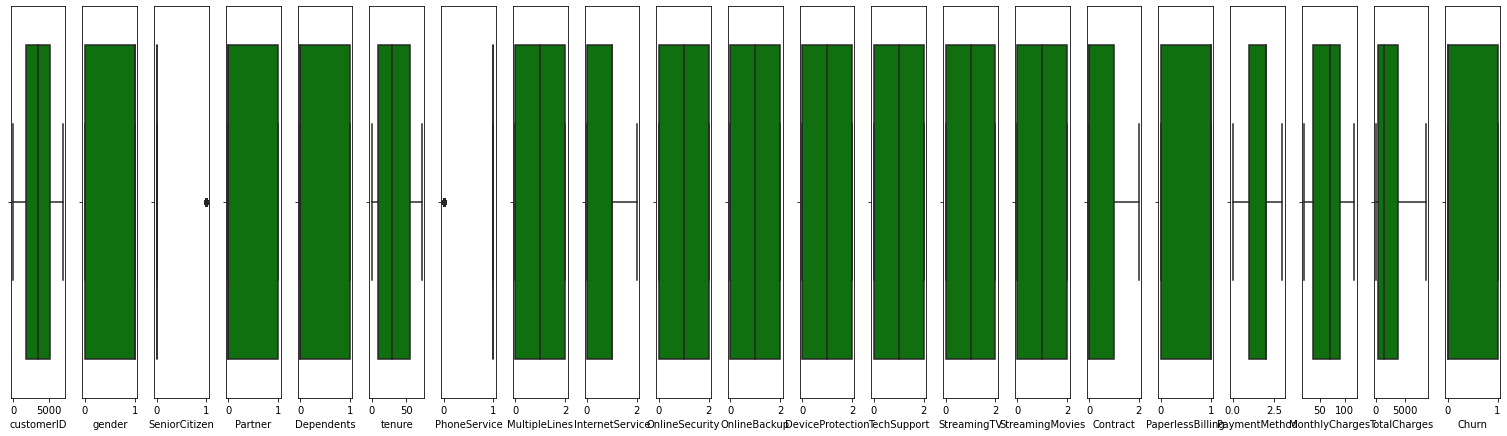

In [92]:
collist=df.columns.values
ncol=30
nrows=15
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

customerID             AxesSubplot(0.125,0.749828;0.133621x0.130172)
gender              AxesSubplot(0.285345,0.749828;0.133621x0.130172)
SeniorCitizen        AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Partner             AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Dependents          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
tenure                 AxesSubplot(0.125,0.593621;0.133621x0.130172)
PhoneService        AxesSubplot(0.285345,0.593621;0.133621x0.130172)
MultipleLines        AxesSubplot(0.44569,0.593621;0.133621x0.130172)
InternetService     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
OnlineSecurity      AxesSubplot(0.766379,0.593621;0.133621x0.130172)
OnlineBackup           AxesSubplot(0.125,0.437414;0.133621x0.130172)
DeviceProtection    AxesSubplot(0.285345,0.437414;0.133621x0.130172)
TechSupport          AxesSubplot(0.44569,0.437414;0.133621x0.130172)
StreamingTV         AxesSubplot(0.606034,0.437414;0.133621x0.130172)
StreamingMovies     AxesSubplot(0.

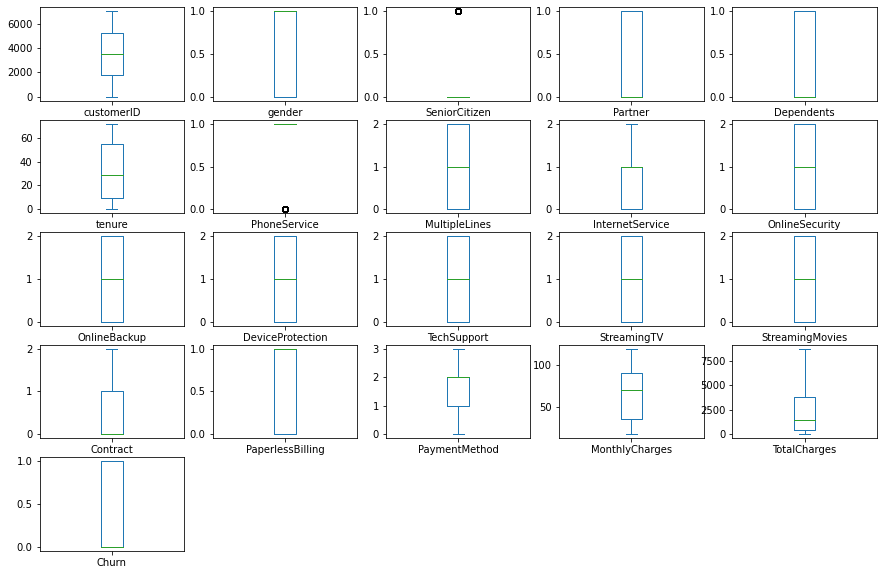

In [93]:
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,10))

As we can see in upper observations only SeniorCitizen and Phoneservice columns have contains outliers

<AxesSubplot:>

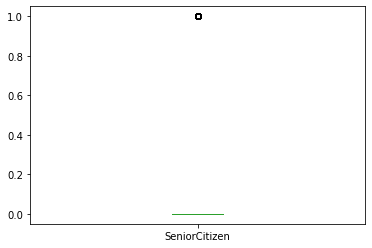

In [95]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

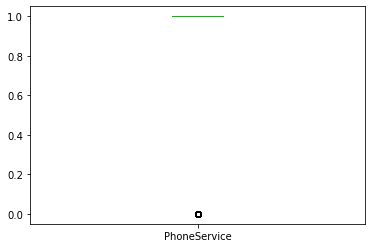

In [96]:
df['PhoneService'].plot.box()

in both figures we can clearly see there is some outliers are present in SeniorCitizen and Phoneservice columns...he column SeniorCitizen is nominal type, so we can not consider datapoints as outliers

# Outlier Removal:-

In [97]:
df.shape

(7043, 21)

In [98]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [99]:
df_new=df[(z<3).all(axis=1)]

In [100]:
df_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1


In [101]:
df_new.shape

(6361, 21)

# % of data loss:-

In [102]:
loss_percent=(7073-6361)/7073*100
print(loss_percent,'%')

10.066449879824685 %


10% of data are remove which is outliers

Our dataset is baised as it is not considering the case of Senior Citizen.Thus i will not remove outliers

# Separating the columns into fatures and targets:-

In [104]:
x=df.drop("Churn",axis=1)
y=df['Churn']

In [105]:
x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60


In [106]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

# Finding best Rtandom state:-

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [115]:
maxAccu=0    #max accuracy
maxRS=0      #for best ranom state value for wuich max accuracy is acheived

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)      #fitting the data 
    predrf=lr.predict(x_test)    #predicted target variable
    acc=accuracy_score(y_test,predrf)
    print('accuracy : ',acc,'random state :',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

accuracy :  0.7970191625266146 random state : 1
accuracy :  0.7991483321504613 random state : 2
accuracy :  0.8062455642299503 random state : 3
accuracy :  0.7806955287437899 random state : 4
accuracy :  0.7920511000709723 random state : 5
accuracy :  0.8069552874378992 random state : 6
accuracy :  0.7984386089425124 random state : 7
accuracy :  0.7899219304471257 random state : 8
accuracy :  0.7899219304471257 random state : 9
accuracy :  0.7955997161107168 random state : 10
accuracy :  0.8076650106458482 random state : 11
accuracy :  0.7970191625266146 random state : 12
accuracy :  0.8062455642299503 random state : 13
accuracy :  0.8019872249822569 random state : 14
accuracy :  0.801277501774308 random state : 15
accuracy :  0.8062455642299503 random state : 16
accuracy :  0.7877927608232789 random state : 17
accuracy :  0.8090844570617459 random state : 18
accuracy :  0.808374733853797 random state : 19
accuracy :  0.8090844570617459 random state : 20
accuracy :  0.7977288857345636 

In [116]:
print('Best accuracy score is :- ',maxAccu,'On random state :-',maxRS)

Best accuracy score is :-  0.8275372604684174 On random state :- 771


# Creating Train-Test-split

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=771)

In [161]:
x_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2890,1180.0,0.0,1,1.0,1.0,47,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.55,3309.25
6209,2388.0,1.0,0,0.0,0.0,29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,24.85,788.05
2500,465.0,1.0,0,1.0,1.0,50,1.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,75.50,4025.60
2968,158.0,1.0,0,0.0,0.0,3,1.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,90.40,268.45
6764,5440.0,0.0,0,0.0,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,69.20,69.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,5103.0,1.0,0,1.0,1.0,72,1.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,68.40,4855.35
5610,906.0,0.0,0,0.0,0.0,3,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,75.50,220.60
4850,637.0,0.0,0,0.0,0.0,54,1.0,0.0,1.0,2.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,100.05,5299.65
3313,2963.0,1.0,0,0.0,0.0,1,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,19.20,19.20


In [162]:
y_train

2890    1
6209    0
2500    0
2968    0
6764    1
       ..
5955    0
5610    1
4850    0
3313    0
3354    0
Name: Churn, Length: 5634, dtype: int32

In [163]:
x_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5370,66.0,1.0,0,1.0,1.0,16,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,90.80,1442.20
2236,2391.0,1.0,1,0.0,0.0,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,71.45,371.60
4039,5796.0,1.0,0,0.0,0.0,7,1.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,2.0,94.10,701.30
5323,997.0,0.0,0,1.0,1.0,58,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,105.20,6225.40
3100,5169.0,0.0,0,1.0,0.0,55,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,94.45,5073.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,646.0,1.0,1,1.0,0.0,58,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,98.70,5812.60
958,2813.0,1.0,0,0.0,0.0,25,1.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,81.75,2028.80
3854,144.0,0.0,0,1.0,0.0,50,1.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,1.0,0.0,109.65,5405.80
3013,1395.0,0.0,0,0.0,0.0,29,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,71.00,2080.10


In [164]:
y_test

5370    0
2236    0
4039    0
5323    0
3100    0
       ..
4074    1
958     0
3854    0
3013    0
4490    0
Name: Churn, Length: 1409, dtype: int32

In [165]:
x_train.shape

(5634, 20)

In [166]:
y_train.shape

(5634,)

In [167]:
x_test.shape

(1409, 20)

In [168]:
y_test.shape

(1409,)

# Logistic Regression:-

In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy',accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 82.75372604684173
[[977  85]
 [158 189]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1062
           1       0.69      0.54      0.61       347

    accuracy                           0.83      1409
   macro avg       0.78      0.73      0.75      1409
weighted avg       0.82      0.83      0.82      1409



# Decision Tree Classifier:-

In [171]:
from sklearn.tree import DecisionTreeClassifier

In [172]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 73.17246273953158
[[843 219]
 [159 188]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1062
           1       0.46      0.54      0.50       347

    accuracy                           0.73      1409
   macro avg       0.65      0.67      0.66      1409
weighted avg       0.75      0.73      0.74      1409



# Random Forest Classifier:-

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 73.17246273953158
[[843 219]
 [159 188]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1062
           1       0.46      0.54      0.50       347

    accuracy                           0.73      1409
   macro avg       0.65      0.67      0.66      1409
weighted avg       0.75      0.73      0.74      1409



Here accuracy is almost 73%
And True positive is 843 & true negative is 188
and also there is 219 false positive and 159 false negative.

# SVC:-

In [178]:
from sklearn.svm import SVC

In [179]:
svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print('Accuracy',accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 74.66288147622427
[[1062    0]
 [ 347    0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1062
           1       0.00      0.00      0.00       347

    accuracy                           0.75      1409
   macro avg       0.38      0.50      0.43      1409
weighted avg       0.57      0.75      0.65      1409



Here accuracy is almost 75%
And True positive is 1062 & true negative is 0
and also there is 0 false positive and 347 false negative.

# Cross Validation:-

In [183]:
from sklearn.model_selection import cross_val_score

In [184]:
scr=cross_val_score(lr,x,y,cv=5)
print('Cross Validation score of Logistic Regression model : ',scr.mean())

Cross Validation score of Logistic Regression model :  0.7992335190980062


In [186]:
scr2=cross_val_score(dt,x,y,cv=5)
print('Cross Validation score of Decision tree model : ',scr2.mean())

Cross Validation score of Decision tree model :  0.7258285816826893


In [187]:
scr3=cross_val_score(rf,x,y,cv=5)
print('Cross Validation score of Random Forest model : ',scr3.mean())

Cross Validation score of Random Forest model :  0.7946908873153108


In [188]:
scr4=cross_val_score(svc,x,y,cv=5)
print('Cross Validation score of SVC model : ',scr4.mean())

Cross Validation score of SVC model :  0.7346301575908123


# Hyper Parameter Tunning:-

In [194]:
from sklearn.model_selection import GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],
            'max_depth':[4,5,6,7,8],
            'criterion':['gini','entropy']}

In [197]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [198]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [199]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2')

In [200]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8246983676366217

its tune upto 2-3%

# ROC AUC plot:-

In [201]:
from sklearn.metrics import plot_roc_curve

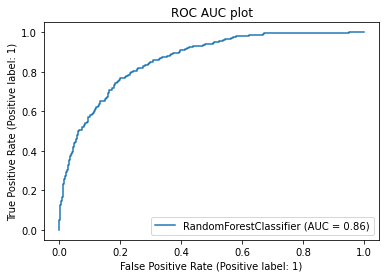

In [203]:
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

the final accuracy is 82% and auc is 86% which is pretty good accuracy

# Saving the model in pickle format

In [204]:
import joblib

In [205]:
joblib.dump(GCV.best_estimator_,"customerChurn.pkl")

['customerChurn.pkl']